In [2]:
! nvidia-smi

Thu Oct 15 07:10:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
! git clone https://github.com/mtoneva/example_forgetting

Cloning into 'example_forgetting'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 194 (delta 3), reused 0 (delta 0), pack-reused 185
Receiving objects: 100% (194/194), 568.41 KiB | 795.00 KiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
!pip install torch==0.4.1.post2

In [4]:
!pip install torchvision==0.1.8

  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [5]:
!python /content/example_forgetting/run_mnist.py --dataset mnist --no_dropout --output_dir mnist_results --seed 2 --batch_size 256

{'dataset': 'mnist', 'batch_size': 256, 'epochs': 200, 'lr': 0.01, 'momentum': 0.5, 'no_cuda': False, 'seed': 2, 'sorting_file': 'none', 'remove_n': 0, 'keep_lowest_n': 0, 'no_dropout': True, 'input_dir': 'mnist_results/', 'output_dir': 'mnist_results'}
Processing...
Done!
Training on 60000 examples
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
| Epoch [  0/200] Iter[235/235]		Loss: 0.2591 Acc@1: 63.132%
| Validation Epoch #0			Loss: 0.1877 Acc@1: 89.66%
| Elapsed time : 0:00:19
| Epoch [  1/200] Iter[235/235]		Loss: 0.0906 Acc@1: 91.520%
| Validation Epoch #1			Loss: 0.1171 Acc@1: 93.64%
| Elapsed time : 0:00:38
| Epoch [  2/200] Iter[235/235]		Loss: 0.1218 Acc@1: 94.327%
| Validation Epoch #2			Loss: 0.0393 Acc@1: 95.29%
| Elapsed time : 0:00:58
| Epoch [  3/200] Iter[235/235]		Loss: 0.1215 Acc@1: 95.800%
| Validation Epoch #3			L

In [6]:
!python /content/example_forgetting/order_examples_by_forgetting.py --output_dir mnist_results --output_name mnist_sorted --input_dir mnist_results --input_fname_args dataset mnist no_dropout True sorting_file none remove_n 0 keep_lowest_n 0

Namespace(epochs=200, input_dir='mnist_results', input_fname_args=['dataset', 'mnist', 'no_dropout', 'True', 'sorting_file', 'none', 'remove_n', '0', 'keep_lowest_n', '0'], output_dir='mnist_results', output_name='mnist_sorted')
including file: dataset_mnist__no_dropout_True__seed_2__sorting_file_none__remove_n_0__keep_lowest_n_0__stats_dict.pkl
Number of unforgettable examples: 56257


In [7]:
import pandas as pd
object = pd.read_pickle(r'/content/mnist_results/mnist_sorted.pkl')
df = pd.DataFrame(object)
df

,indices,forgetting counts
0,10327,0
1,1516,0
2,333,0
3,3385,0
4,32778,0
...,...,...
59995,6347,32
59996,21889,32
59997,23886,43
59998,26560,200


In [8]:
df['forgetting counts'].describe()

count    60000.000000
mean         0.272217
std          2.009946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: forgetting counts, dtype: float64

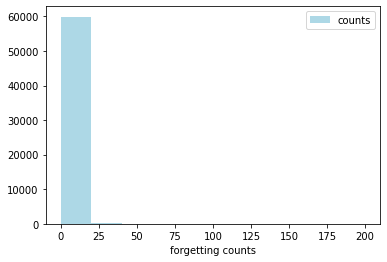

In [11]:
import matplotlib.pyplot as plt
plt.hist(df['forgetting counts'], density=False, color = 'lightblue', cumulative = False, label = "counts")
plt.legend()
plt.xlabel('forgetting counts')
plt.show()